In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('notebook_repr_html',True)

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

/Users/fgonza/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Quick and Dirty Introduction to Keras

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Keras
### Deep Learning library for Theano and TensorFlow (https://keras.io/)


* Allows for easy and fast prototyping (through total modularity, minimalism, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Supports arbitrary connectivity schemes (including multi-input and multi-output training).
* Runs seamlessly on CPU and GPU.

## The Little Red Riding Hood Neural Network

<img src="http://themaleharem.com/wp-content/uploads/2014/06/Walter-crane-little-red-riding-hood-meets-the-wolf-in-the-woods.jpg">

## LRRH Network Architecture

<img src="lrrh_net.jpg" width="600">

## Defining a neural network model


In [2]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(output_dim=3, input_dim=4))
model.add(Activation("sigmoid"))
model.add(Dense(output_dim=4))
model.add(Activation("sigmoid"))

model.compile(loss='mse', 
              optimizer=SGD(lr = 1))

Using Theano backend.


In [3]:
model.summary(70)

______________________________________________________________________
Layer (type)           Output Shape   Param # Connected to            
dense_1 (Dense)        (None, 3)      15      dense_input_1[0][0]     
______________________________________________________________________
activation_1 (Activatio(None, 3)      0       dense_1[0][0]           
______________________________________________________________________
dense_2 (Dense)        (None, 4)      16      activation_1[0][0]      
______________________________________________________________________
activation_2 (Activatio(None, 4)      0       dense_2[0][0]           
Total params: 31
______________________________________________________________________


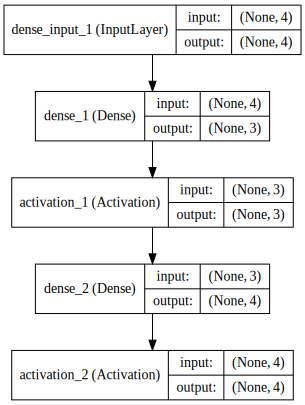

In [4]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Training data


In [5]:
X = [[1,1,0,0], [1,0,1,0], [0,0,0,1]]
Y = [[1,0,0,0], [0,0,1,1], [0,1,1,0]]
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
df.join(pd.DataFrame(Y, columns=['Scream', 'Hug', 'Food', 'Kiss']))

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,0,0,1,0,0,0
1,1,0,1,0,0,0,1,1
2,0,0,0,1,0,1,1,0


## Training

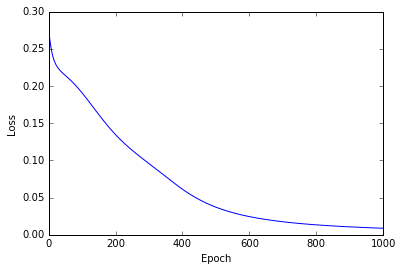

In [6]:
history = model.fit(X, Y, nb_epoch=1000, batch_size=3,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Prediction

In [7]:
def lrrh_input(vals):
    return pd.DataFrame(vals.T,index=['big ears', 'big teeth', 'handsome', 'wrinkled'], columns=['input'])

def lrrh_output(vals):
    return pd.DataFrame(vals.T,index=['scream', 'hug', 'offer food', 'kiss cheek'], columns=['output'])

In [8]:
in_vals = np.array([[1, 1, 0, 0]])
print(lrrh_input(in_vals))
print(lrrh_output(model.predict(in_vals)[0]))

           input
big ears       1
big teeth      1
handsome       0
wrinkled       0
              output
scream      0.907424
hug         0.073242
offer food  0.081095
kiss cheek  0.060945


## Internal representation

In [9]:
from keras import backend as K
get_internal = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[1].output]) 

In [10]:
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
df = df.join(pd.DataFrame(get_internal([X,0])[0], columns=['N1', 'N2', 'N3']))
df.join(pd.DataFrame(Y, columns=['Scream', 'Hug', 'Food', 'Kiss'])) 

,Big Ears,Big Teeth,Handsome,Wrinkled,N1,N2,N3,Scream,Hug,Food,Kiss
0,1,1,0,0,0.213955,0.863976,0.978094,1,0,0,0
1,1,0,1,0,0.717992,0.032653,0.281343,0,0,1,1
2,0,0,0,1,0.818352,0.946012,0.025560,0,1,1,0
